# Data Management & exploration

In [25]:
library(ggplot2)
library(corrplot)
library(dummies)
library("readxl")

library(MASS)

In [26]:
# Load the dataset
f1 = "Release 1 - Food nutrient database.xlsx"
food <- read_excel(f1, sheet='All solids & liquids per 100g')

# Display the dimensions
cat("The food dataset has", dim(food)[1], "records, each with", dim(food)[2],
    "attributes. The structure is:\n")

# Inspect the first few records
head(food)

New names:
* `` -> ...110
* `` -> ...112
* `` -> ...114
* `` -> ...116
* `` -> ...118
* … and 66 more problems



The food dataset has 1535 records, each with 252 attributes. The structure is:


Public Food Key,Classification,Food Name,"Energy, with dietary fibre","Energy, without dietary fibre",Moisture (water),Protein,Nitrogen,Total Fat,Ash,...,Proline,...244,Serine,...246,Threonine,...248,Tyrosine,...250,Valine,...252
NA,NA,NA,kJ,kJ,g,g,g,g,g,...,mg/g N,mg,mg/g N,mg,mg/g N,mg,mg/g N,mg,mg/g N,mg
F002258,31302,"Cardamom seed, dried, ground",1236,1012,8.3000000000000007,10.8,1.72,6.7,5.8,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
F002893,31302,"Chilli (chili), dried, ground",1280,1002,10.8,13.4,2.14,14.3,11.8,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
F002963,31302,"Cinnamon, dried, ground",1004,579,10.6,4,0.64,1.2,3.6,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
F002970,31302,"Cloves, dried, ground",1389,1118,9.9,6,0.96,13,5.6,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
F003190,31302,"Coriander seed, dried, ground",1344,1009,8.9,12.4,1.98,17.8,6,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [27]:
str(food)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	1535 obs. of  252 variables:
 $ Public Food Key                               : chr  NA "F002258" "F002893" "F002963" ...
 $ Classification                                : num  NA 31302 31302 31302 31302 ...
 $ Food Name                                     : chr  NA "Cardamom seed, dried, ground" "Chilli (chili), dried, ground" "Cinnamon, dried, ground" ...
 $ Energy, with dietary fibre                    : chr  "kJ" "1236" "1280" "1004" ...
 $ Energy, without dietary fibre                 : chr  "kJ" "1012" "1002" "579" ...
 $ Moisture (water)                              : chr  "g" "8.3000000000000007" "10.8" "10.6" ...
 $ Protein                                       : chr  "g" "10.8" "13.4" "4" ...
 $ Nitrogen                                      : chr  "g" "1.72" "2.14" "0.64" ...
 $ Total Fat                                     : chr  "g" "6.7" "14.3" "1.2" ...
 $ Ash                                           : chr  "g" "5.8" "11.8" "3.6

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message:
“Removed 213160 rows containing non-finite values (stat_bin).”


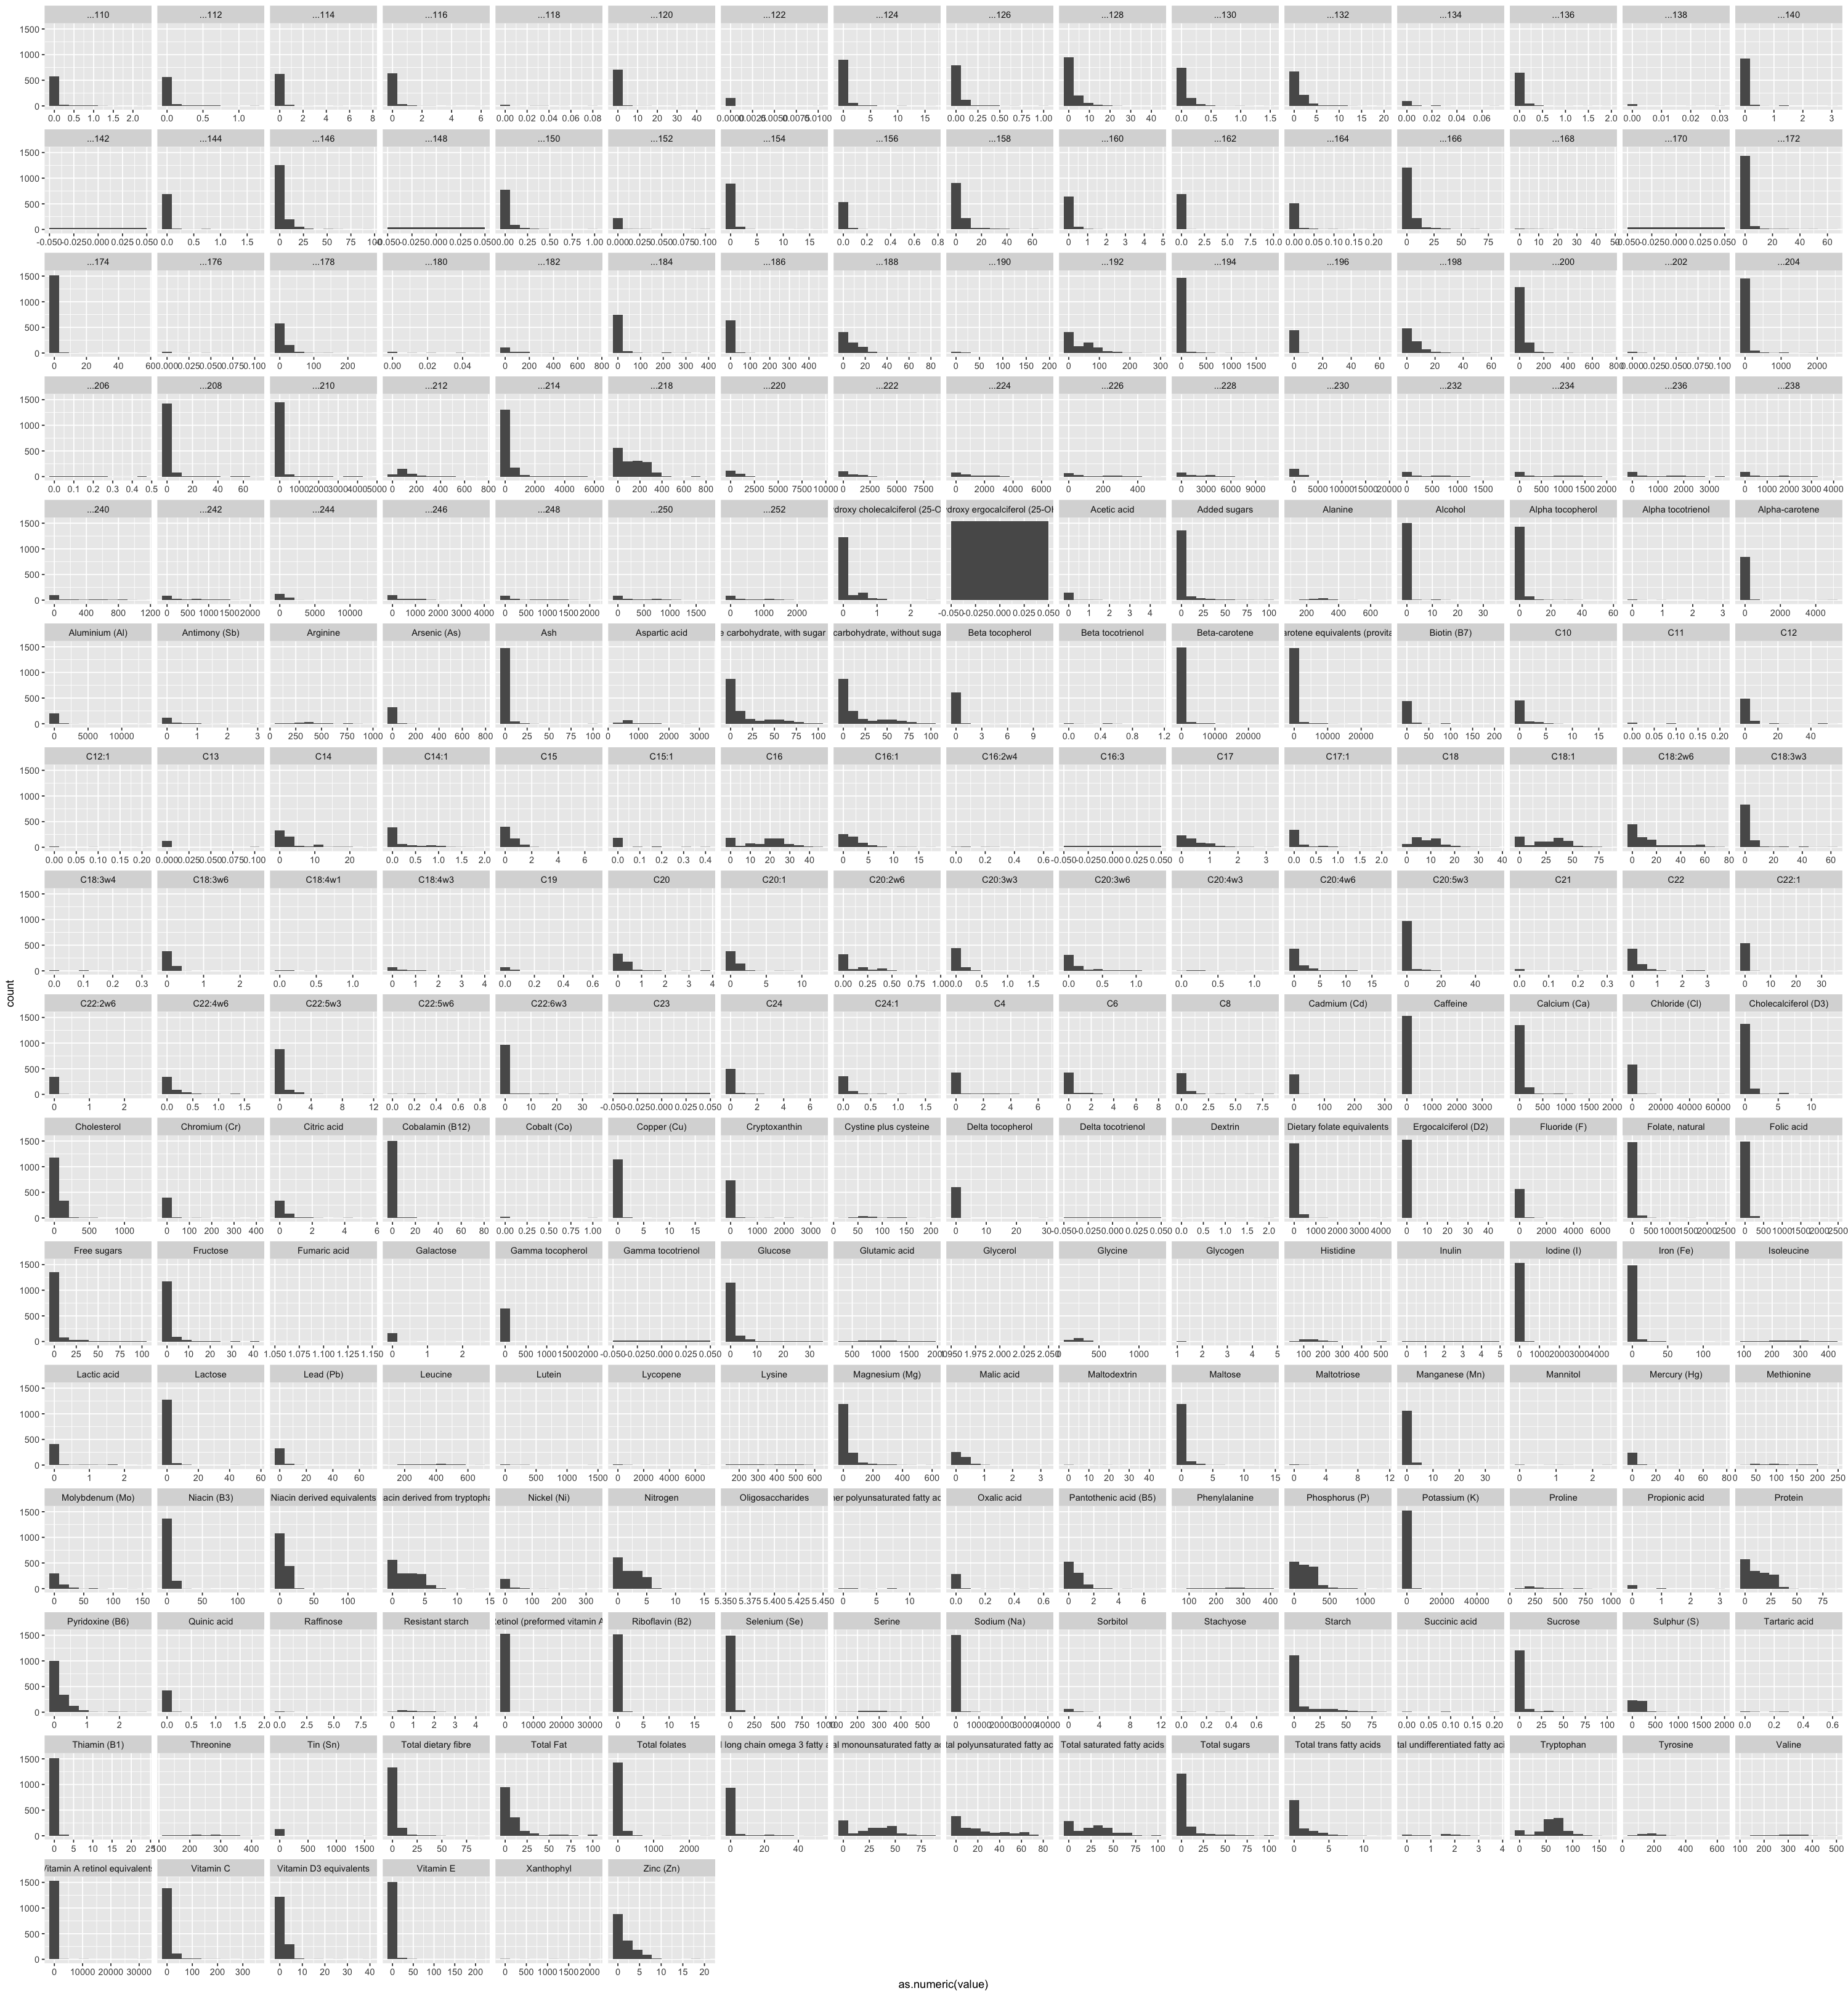

In [31]:
# draw histgram for each column:
library(tidyr)
library(ggplot2)
options(repr.plot.width=25, repr.plot.height=27)

food[is.na(food)] <- 0
df = food[4:ncol(food)]
ggplot(gather(df), aes(as.numeric(value))) + 
    geom_histogram(bins = 10) + 
    facet_wrap(~key, scales = 'free_x')


--- 

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message:
“Removed 2499 rows containing non-finite values (stat_bin).”


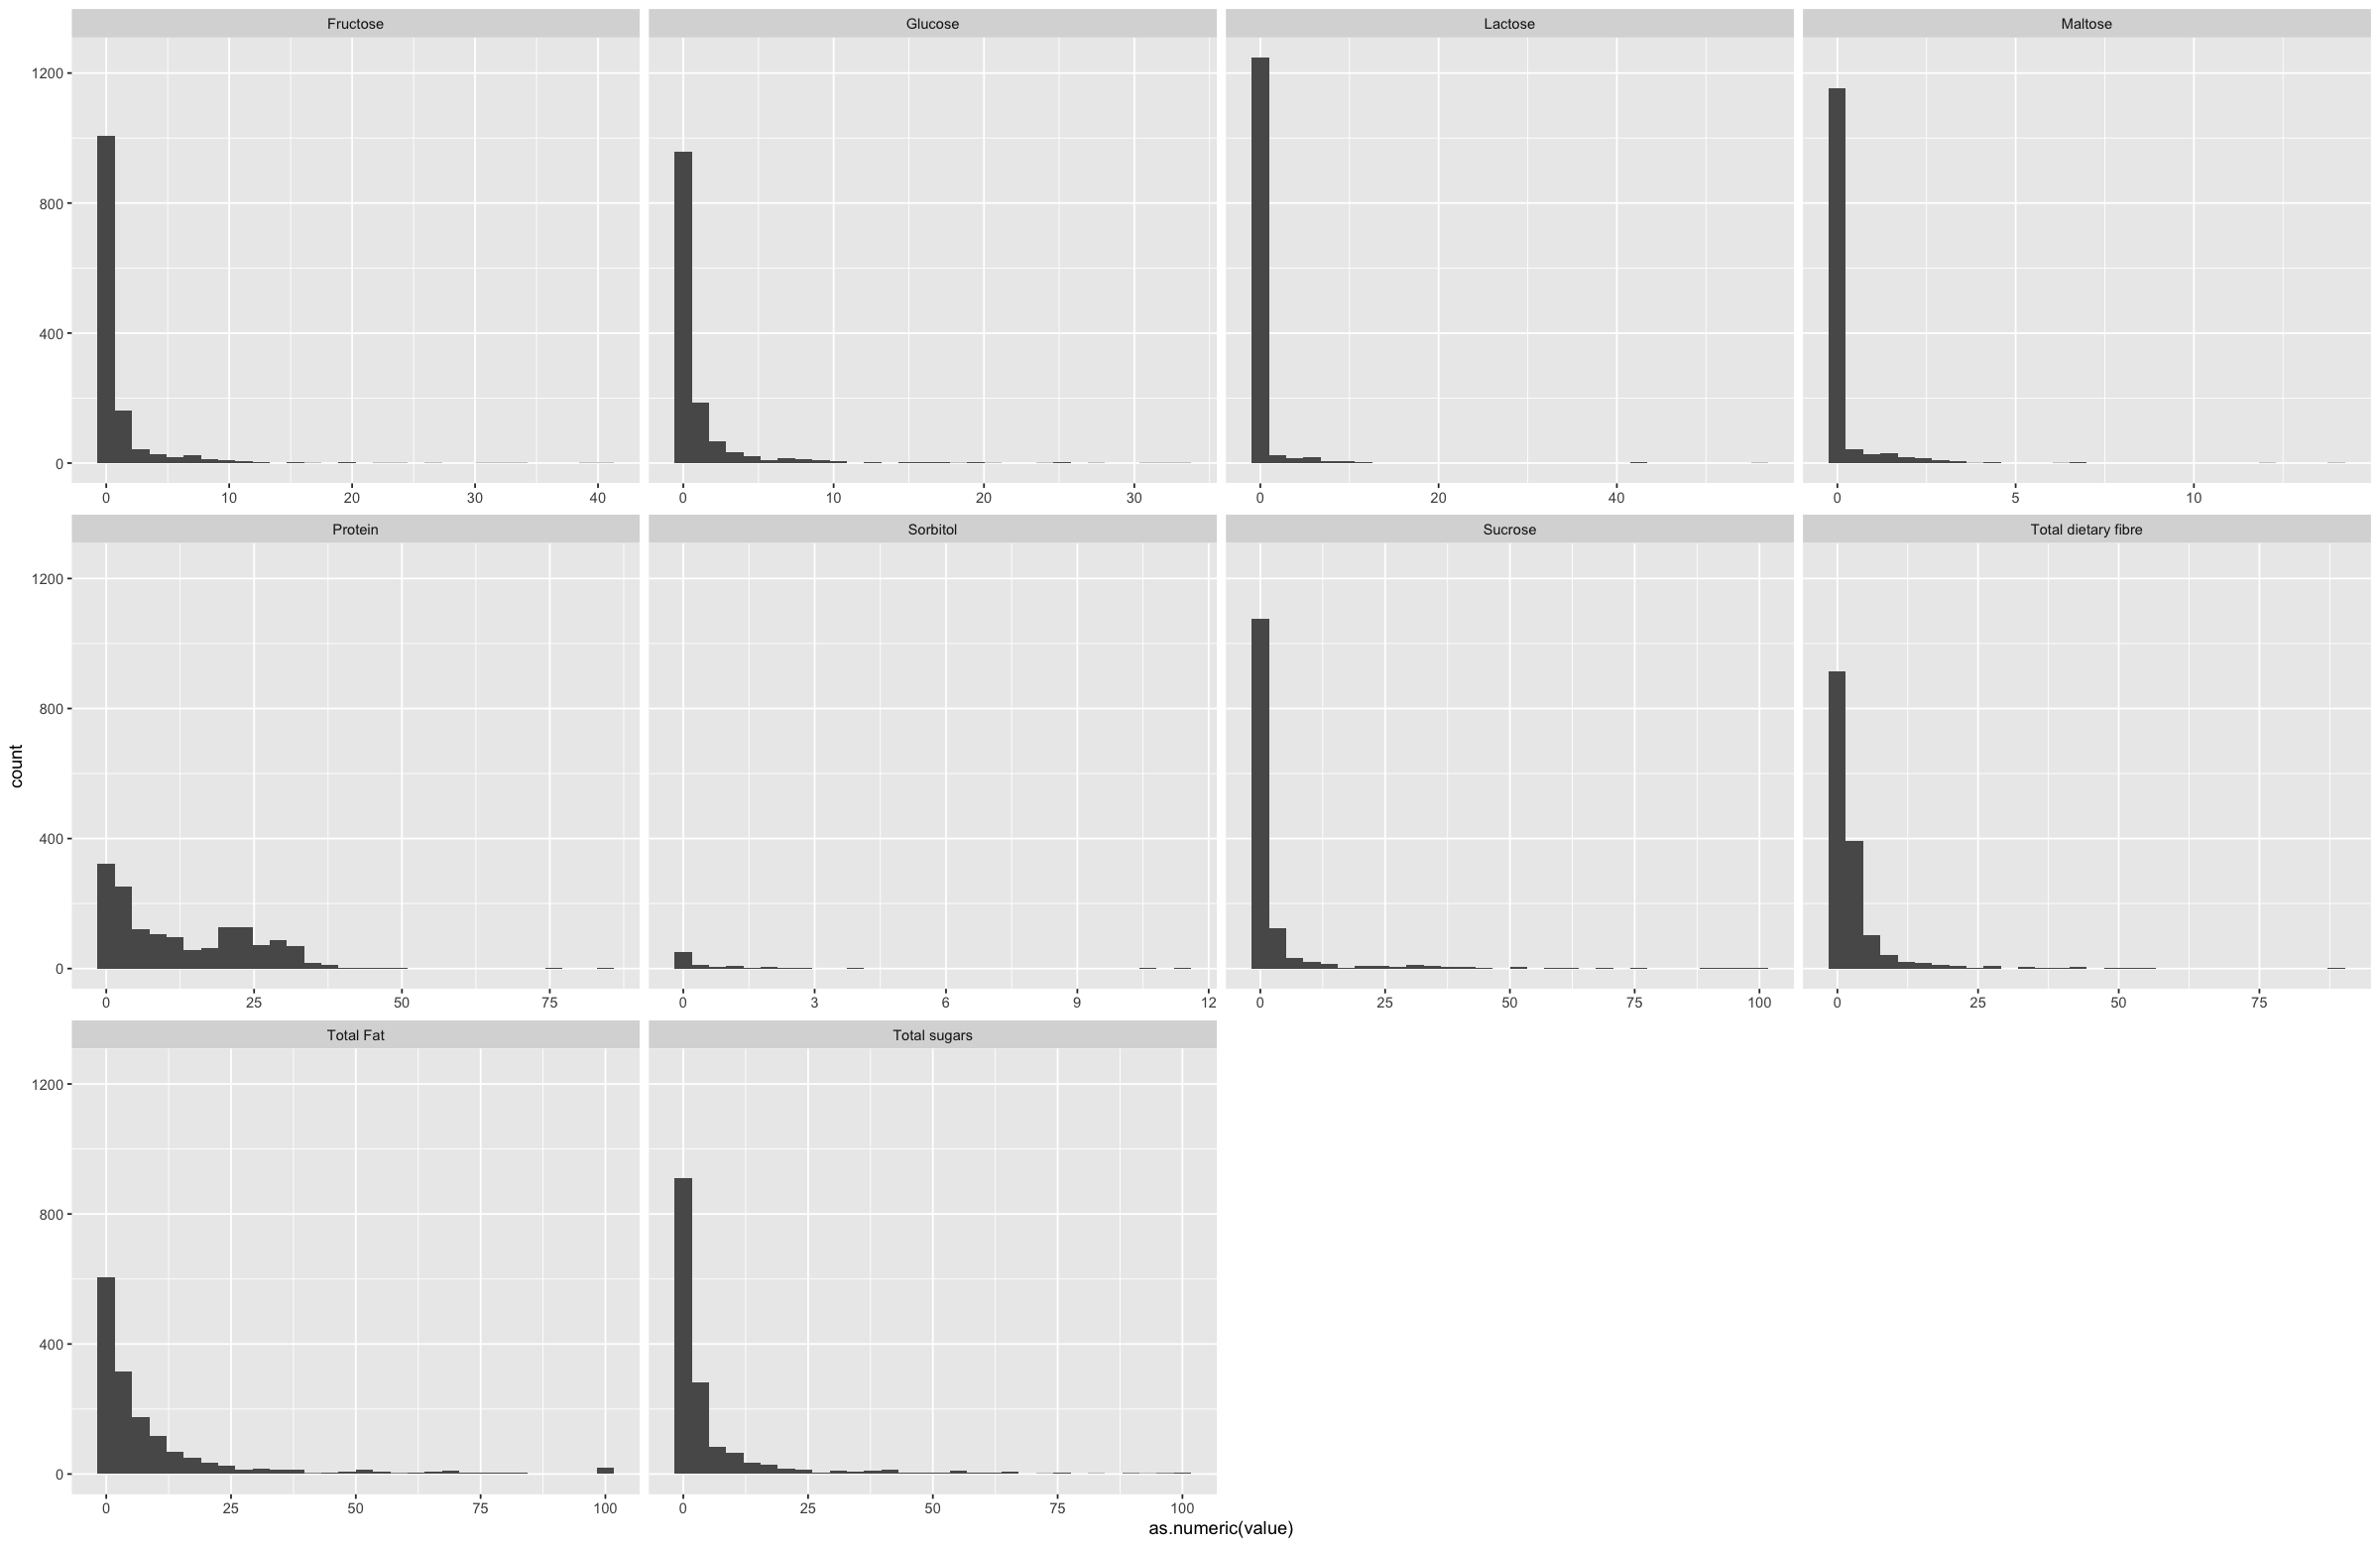

In [40]:
# select some essential features for further processing and draw their histgrams:
df <- food[c('Protein','Total dietary fibre','Total Fat','Fructose','Glucose',
             'Sucrose','Maltose','Lactose','Total sugars','Sorbitol')]

options(repr.plot.width=20, repr.plot.height=13)
ggplot(gather(df), aes(as.numeric(value))) + 
    geom_histogram(bins = 30) + 
    facet_wrap(~key, scales = 'free_x')